In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import os
os.chdir('/Users/wyattscott/Documents/DS6050/Project')

In [22]:
df = pd.read_csv('Speeches_War_Clean.csv')

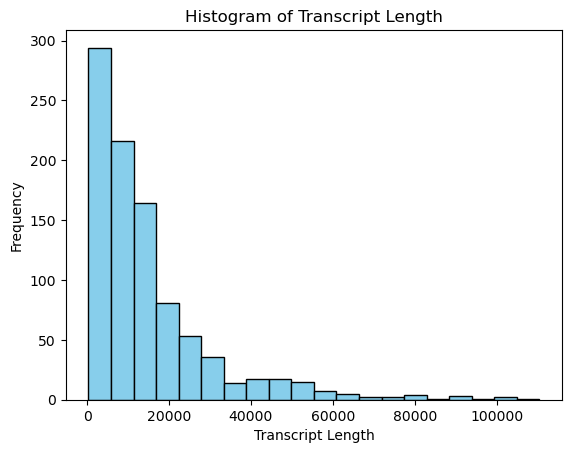

In [23]:
# Calculate the length of each transcript
df['Transcript Length'] = df['Transcript'].apply(len)

# Plot histogram
plt.hist(df['Transcript Length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Transcript Length')
plt.ylabel('Frequency')
plt.title('Histogram of Transcript Length')
plt.show()

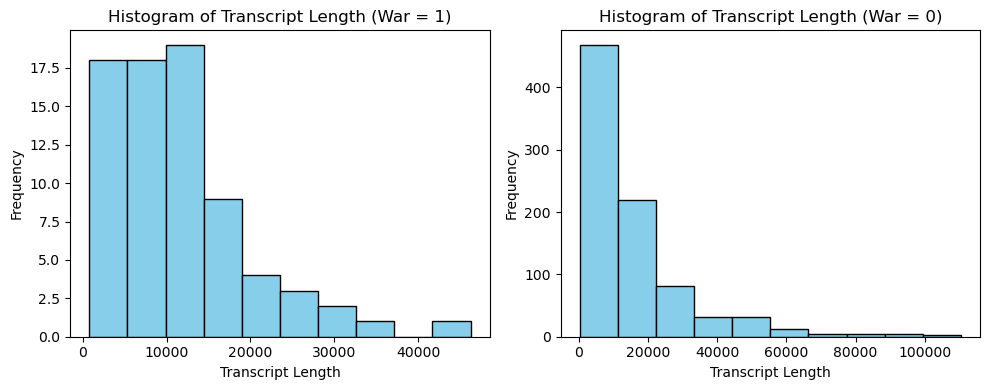

In [29]:
# Create subplots for side-by-side histograms
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Function to plot histogram for a specific subset of data
def plot_histogram(ax, df, war_value):
    subset_lengths = df[df['War'] == war_value]['Transcript'].apply(len)
    ax.hist(subset_lengths, bins=10, color='skyblue', edgecolor='black')
    ax.set_xlabel('Transcript Length')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of Transcript Length (War = {war_value})')

# Plot histogram for "War" = 1
plot_histogram(axs[0], df, 1)

# Plot histogram for "War" = 0
plot_histogram(axs[1], df, 0)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plots
plt.show()

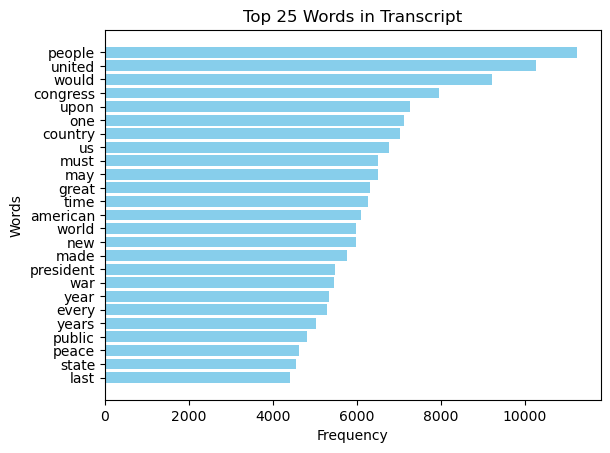

In [32]:
# Tokenize each transcript text and count word frequency
word_counts = Counter()
for transcript in df['Transcript']:
    words = transcript.split()
    word_counts.update(words)

# Get the top 25 words
top_words = word_counts.most_common(25)

# Plot the top 25 words
words, counts = zip(*top_words)
plt.barh(range(len(words)), counts, color='skyblue')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 25 Words in Transcript')
plt.gca().invert_yaxis()  # Invert y-axis to have the most common word on top
plt.show()

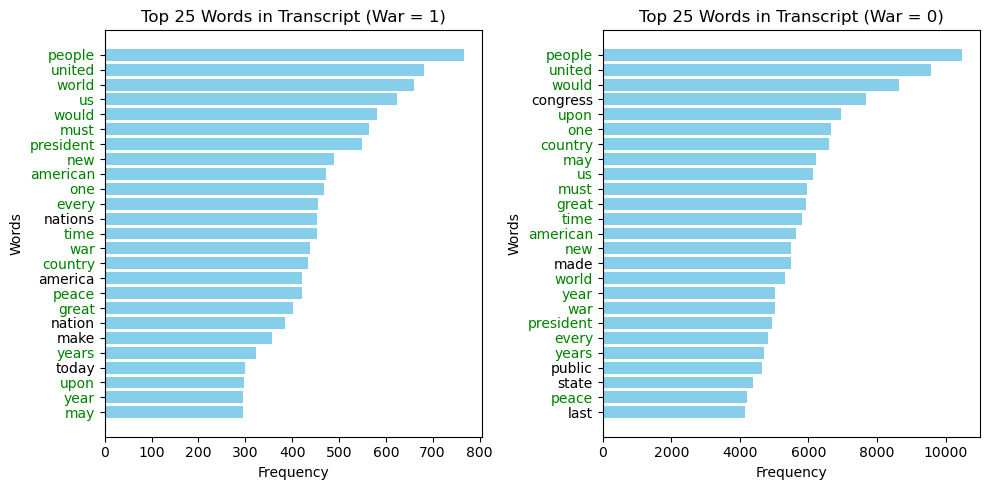

In [34]:
# Function to get top words and plot frequency
def plot_top_words(ax, df, war_value):
    # Filter DataFrame based on the value of "War" column
    subset_df = df[df['War'] == war_value]

    # Tokenize each transcript text and count word frequency
    word_counts = Counter()
    for transcript in subset_df['Transcript']:
        words = transcript.split()
        word_counts.update(words)

    # Get the top 25 words
    top_words = word_counts.most_common(25)

    # Plot the top 25 words
    words, counts = zip(*top_words)
    ax.barh(range(len(words)), counts, color='skyblue')
    ax.set_yticks(range(len(words)))
    ax.set_yticklabels(words)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Words')
    ax.set_title(f'Top 25 Words in Transcript (War = {war_value})')
    ax.invert_yaxis()  # Invert y-axis to have the most common word on top

    return set(words)  # Return the set of top words

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Get the top words for both subsets
top_words_war_1 = plot_top_words(axs[0], df, 1)
top_words_war_0 = plot_top_words(axs[1], df, 0)

# Find the intersection of top words
common_words = top_words_war_1.intersection(top_words_war_0)

# Mark the common words in both plots
for ax in axs:
    yticks = ax.get_yticklabels()
    for label in yticks:
        if label.get_text() in common_words:
            label.set_color('green')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plots
plt.show()